In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# figures inline, ignore warnings, setting visualisation style, standardisation
%matplotlib inline 
import warnings 
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
sns.set()

# algo libraries
from sklearn.cluster import KMeans

# evaluation libraries
from sklearn.metrics import silhouette_score

In [2]:
# load datasets
data = pd.read_csv("Mall_Customers.csv")

In [3]:
# basic details about data
data.head()

,CustomerID,Genre,Age,Monthly Income (Rs. '000),Spending Score
0,1,Male,37,48,45
1,2,Male,27,48,83
2,3,Female,48,50,15
3,4,Male,33,50,83
4,5,Female,56,56,24


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   CustomerID                 194 non-null    int64 
 1   Genre                      194 non-null    object
 2   Age                        194 non-null    int64 
 3   Monthly Income (Rs. '000)  194 non-null    int64 
 4   Spending Score             194 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.7+ KB


In [5]:
# finding null values
data.isnull().sum()

CustomerID                   0
Genre                        0
Age                          0
Monthly Income (Rs. '000)    0
Spending Score               0
dtype: int64

In [6]:
# for standardisation
x = data.iloc[:,3:]

In [7]:
x.head()

,Monthly Income (Rs. '000),Spending Score
0,48,45
1,48,83
2,50,15
3,50,83
4,56,24


In [8]:
# standardisation if required
cols = x.columns
scaler = StandardScaler()
x_std = pd.DataFrame(scaler.fit_transform(x), columns=cols)

In [9]:
x_std.head()

,Monthly Income (Rs. '000),Spending Score
0,-1.478508,-0.598587
1,-1.478508,0.888701
2,-1.435200,-1.772762
3,-1.435200,0.888701
4,-1.305275,-1.420510


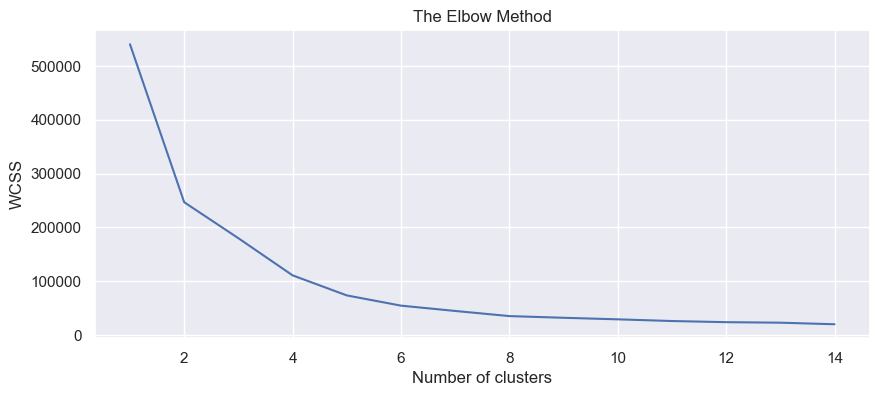

In [10]:
# finding optimised no. of clusters by Elbow method
plt.figure(figsize=(10,4))
wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters = i,init = 'k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [11]:
# applying algorithm with optimised no. of clusters
kmeans = KMeans(n_clusters = 5, init = 'k-means++')
clusters = kmeans.fit_predict(x)

In [12]:
# printing clusters for each data point
clusters

array([2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 3, 3, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4])

In [13]:
# adding clusters to original data frame
cluster_data = pd.concat([data,pd.DataFrame(clusters, columns=['Cluster'])], axis=1)

In [14]:
cluster_data.head()

,CustomerID,Genre,Age,Monthly Income (Rs. '000),Spending Score,Cluster
0,1,Male,37,48,45,2
1,2,Male,27,48,83,0
2,3,Female,48,50,15,2
3,4,Male,33,50,83,0
4,5,Female,56,56,24,2


In [15]:
# silhouette_score
score = silhouette_score(x, clusters)
print(score)

0.5407443734399685


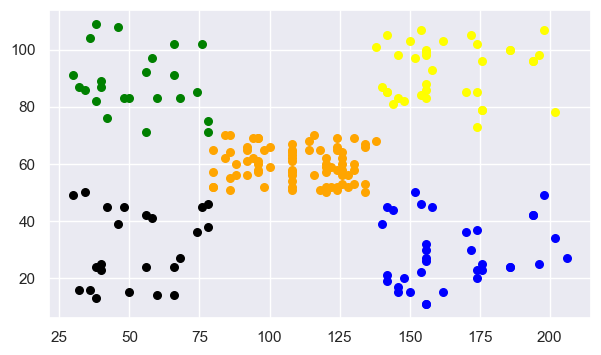

In [16]:
# clusters visualisation
plt.figure(figsize=(7, 4))
plt.scatter(x[x.columns[0]][clusters==0],x[x.columns[1]][clusters==0], s=30, c= 'green',label = 'Cluster0')
plt.scatter(x[x.columns[0]][clusters==1],x[x.columns[1]][clusters==1], s=30, c= 'blue',label = 'Cluster1')
plt.scatter(x[x.columns[0]][clusters==2],x[x.columns[1]][clusters==2], s=30, c= 'black',label = 'Cluster2')
plt.scatter(x[x.columns[0]][clusters==3],x[x.columns[1]][clusters==3], s=30, c= 'orange',label = 'Cluster3')
plt.scatter(x[x.columns[0]][clusters==4],x[x.columns[1]][clusters==4], s=30, c= 'yellow',label = 'Cluster4')

In [ ]:
palette = ['tab:green', 'tab:orange', 'tab:red', 'tab:pink', 'tab:blue']
sns.scatterplot(data=cluster_data,x="Monthly Income (Rs. '000)",y='Spending Score',hue='Cluster',palette=palette)

<Axes: xlabel="Monthly Income (Rs. '000)", ylabel='Spending Score'>